In [1]:
%cd ..

/home/jairo/Documentos/GitHub/parallel-kink-scattering


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from modules.numeric import *

In [3]:
from math import acosh, asinh, sqrt
phi4 = Phi4()

def y0(x, x0, v, H):
    a = 1/sqrt(abs(H))
    return np.stack((
        (np.tanh(x - acosh(a)) if H > 0 else 1/np.tanh(x - asinh(a))) - phi4.kink(x - x0, 0, v) + 1,
        -phi4.kink_dt(x - x0, 0, v)
    ))

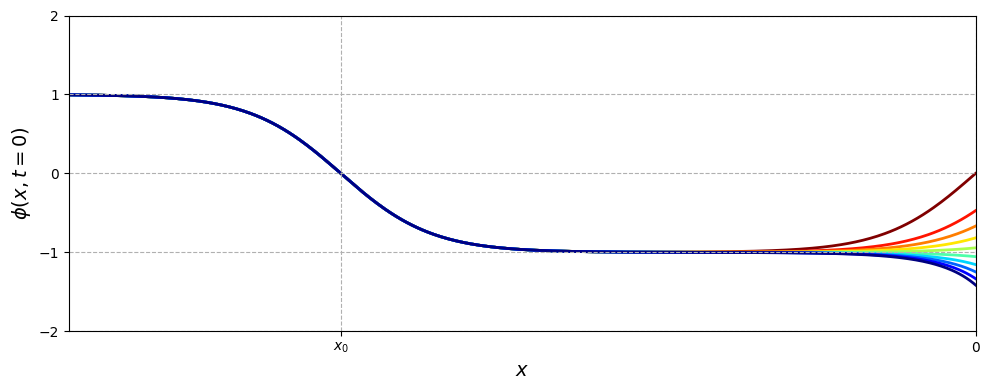

In [4]:
fig, ax = plt.subplots(figsize=(10, 4))

x = np.linspace(-10, 0, 500)
x0 = -7
v = 0
values = np.linspace(-1, 1, 10)
cmap = plt.get_cmap('jet', len(values))

for i, H in enumerate(values):
    ax.plot(x, y0(x, x0, v, H)[0], c=cmap(i), lw=2, zorder=-i)

ax.set_ylim(-2, 2)
ax.set_xlim(x.min(), x.max())

ax.set_yticks((-2, -1, 0, 1, 2))
ax.set_xticks([0, x0], [0, r'$x_0$'])

ax.set_xlabel(r'$x$', fontsize=14)
ax.set_ylabel(r'$\phi(x, t=0)$', fontsize=14)
ax.grid(ls='--')

# dvs = np.r_[-1.5, values]
# cbar = fig.colorbar(ScalarMappable(norm=BoundaryNorm(dvs, ncolors=len(dvs)), cmap=ListedColormap([cmap(i) for i in range(len(dvs))])), ax=ax)
# cbar.ax.set_yticks((dvs[:-1] + dvs[1:])/2, (-1, *values[1:]))
# cbar.ax.set_title(r'$\alpha$')

fig.tight_layout()
plt.show()

In [5]:
L = 100
N = 1024 #int(L/40*1000)
DX = L/N
DT = 4e-2
X0 = -10

In [6]:
collider = Collider(
    x_lattice= (-L, 0, N), 
    dt= DT, 
    order= 4,
    y0= y0,
    pot_diff= Phi4().diff,
    boundaries= ('reflective', 'neumann'),
    integrator='sy6'
)

def plot_boundary_scatter(v, H, T=100):
    collider.rb.param = -DX*H
    lat, Y = collider.run(T, v=v, x0=X0, H=H)
    y, dydt = Y[:, 0], Y[:, 1]
    plt.imshow(y.T, cmap='Spectral_r', vmin=-1, vmax=1, extent=(lat.t.min(), lat.t.max(), lat.x.max(), lat.x.min()), aspect='auto')
    plt.ylim(-25, 0)
    plt.tight_layout()
    return lat, y, dydt

In [7]:
H = -0.4
v = (1 - 4*( (1 + H)**(3/2) + (1 - H)**(3/2) )**-2)**0.5
v

0.3332578934198028

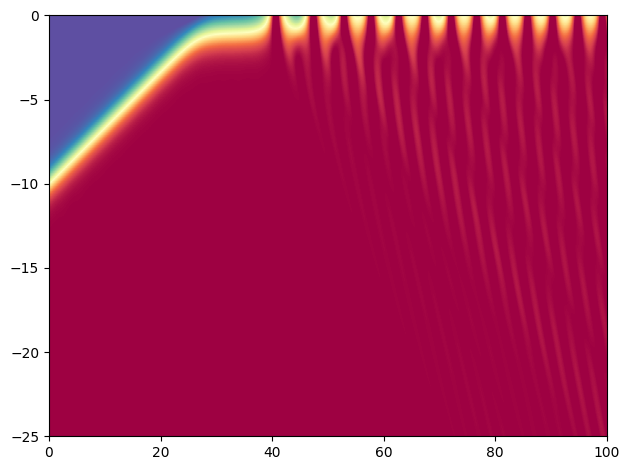

In [8]:
_, y, dydt = plot_boundary_scatter(v=0.333247, H=-0.4)
plt.show()

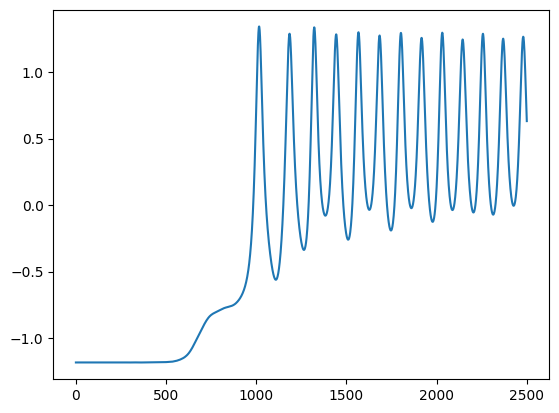

: 

In [9]:
plt.plot(y[:, -1])

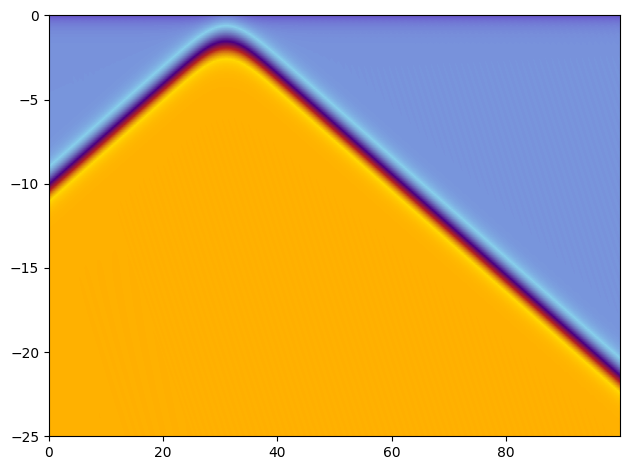

In [12]:
plot_boundary_scatter(v=0.3, H=-0.5)
plt.show()

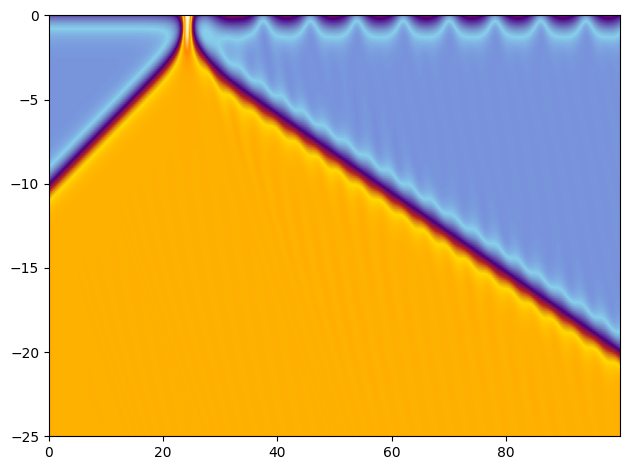

In [13]:
plot_boundary_scatter(v=0.35, H=0.9)
plt.show()

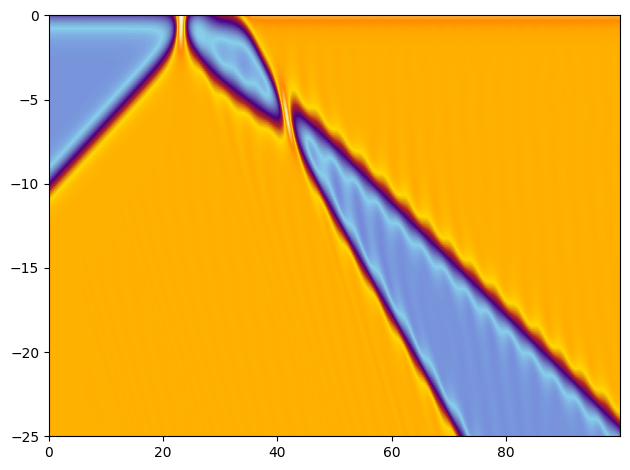

In [14]:
plot_boundary_scatter(v=0.37, H=0.9)
plt.show()

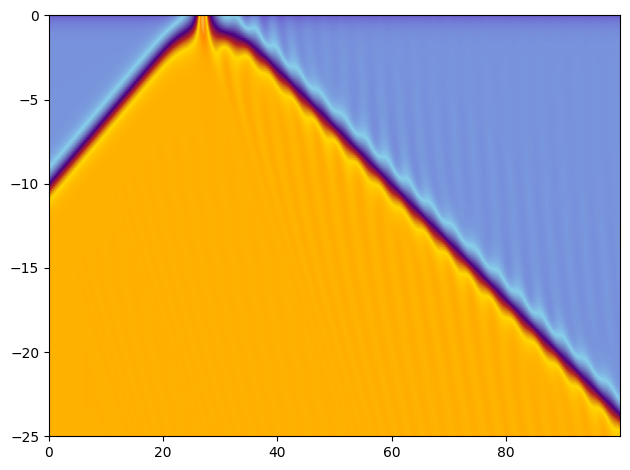

In [15]:
plot_boundary_scatter(v=0.4, H=-0.4)
plt.show()

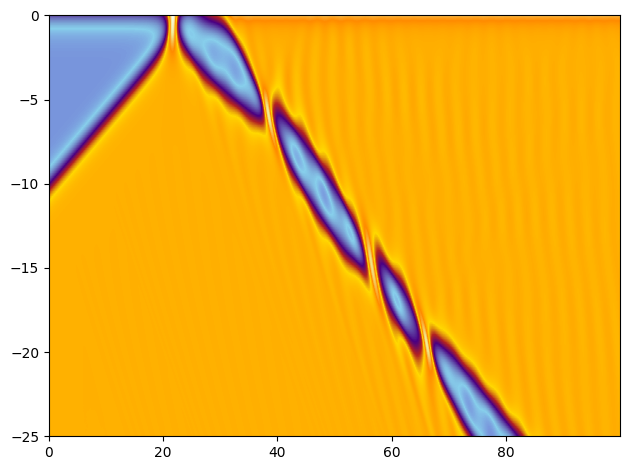

In [16]:
plot_boundary_scatter(v=0.4, H=0.9)
plt.show()